<a href="https://colab.research.google.com/github/srinivas365/Novartis_Hackerearth_challenge/blob/master/Novartis_Hackerearth_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict if server will be hacked
All the countries across the globe have adapted to means of digital payments. And with the increased volume of digital payments, hacking has become a pretty common event wherein the hacker can try to hack your details just with your phone number linked to your bank account. However, there is data with some anonymized variables based on which one can predict that the hack is going to happen.

Your work is to build a predictive model which can identify a pattern in these variables and suggest that a hack is going to happen so that the cyber security can somehow stop it before it actually happens. You have to predict the column : "MALICIOUS_OFFENSE”. 

This notebook contains the following sections:

1. Data Understanding
2. Data Exploration
3. Model Building
4. Hyperparamater tuning
5. Final submission

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:

train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
sub=pd.read_csv('sample_submission.csv')

In [22]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [23]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [24]:
sub.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,0
2,.,.
3,.,.
4,CR_196089,1


# Data Exploration

In [25]:
train.shape

(23856, 18)

In [26]:
test.shape

(15903, 17)

In [27]:
train.MULTIPLE_OFFENSE.value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [0]:
train.drop(['INCIDENT_ID'],axis=1,inplace=True)

In [38]:
discrete = [var for var in train.columns if train[var].dtype!='O' and var!='MULTIPLE_OFFENSE' and train[var].nunique()<10]
continuous = [var for var in train.columns if train[var].dtype!='O' and var!='MULTIPLE_OFFENSE' and var not in discrete]



# categorical
categorical = [var for var in train.columns if train[var].dtype=='O']

print('There are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))

There are 3 discrete variables
There are 12 continuous variables
There are 1 categorical variables


In [39]:
categorical

['DATE']

In [40]:
discrete

['X_1', 'X_5', 'X_9']

In [63]:
continuous

['X_2',
 'X_3',
 'X_4',
 'X_6',
 'X_7',
 'X_8',
 'X_10',
 'X_11',
 'X_12',
 'X_13',
 'X_14',
 'X_15']

In [65]:
for x in continuous:
    print("{} has {} labels".format(x,train[x].nunique()))

X_2 has 52 labels
X_3 has 52 labels
X_4 has 10 labels
X_6 has 19 labels
X_7 has 19 labels
X_8 has 24 labels
X_10 has 24 labels
X_11 has 133 labels
X_12 has 23 labels
X_13 has 60 labels
X_14 has 62 labels
X_15 has 28 labels


In [0]:
train.DATE=pd.to_datetime(train.DATE)

In [0]:
train['month']=train.DATE.apply(lambda x:x.month)
train['day']=train.DATE.apply(lambda x:x.day)
train['weekday']=train.DATE.apply(lambda x:x.weekday())
train['is_weekend']=train.weekday.apply(lambda x: 1 if x==6 or x==5 else 0)

In [51]:
train.head()

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,month,day,weekday,is_weekend
0,2004-07-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,7,4,6,1
1,2017-07-18,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,7,18,1,0
2,2017-03-15,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,3,15,2,0
3,2009-02-13,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,2,13,4,0
4,2005-04-13,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,4,13,2,0


In [0]:
train.drop(['DATE'],axis=1,inplace=True)

In [53]:
train.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,month,day,weekday,is_weekend
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,7,4,6,1
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,7,18,1,0
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,3,15,2,0
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,2,13,4,0
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,4,13,2,0


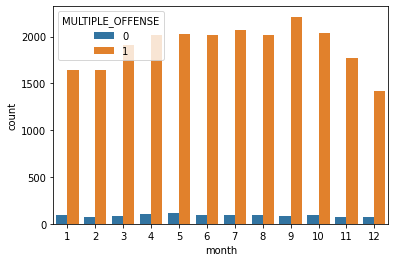

In [58]:
sns.countplot(x='month',hue='MULTIPLE_OFFENSE',data=train)

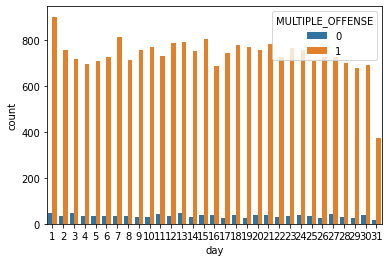

In [59]:
sns.countplot(x='day',hue='MULTIPLE_OFFENSE',data=train)

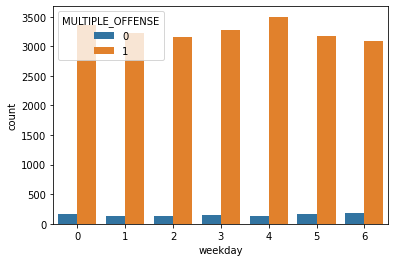

In [60]:
sns.countplot(x='weekday',hue='MULTIPLE_OFFENSE',data=train)

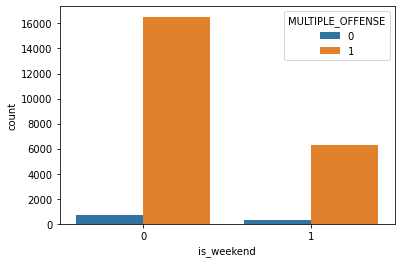

In [62]:
sns.countplot(x='is_weekend',hue='MULTIPLE_OFFENSE',data=train)

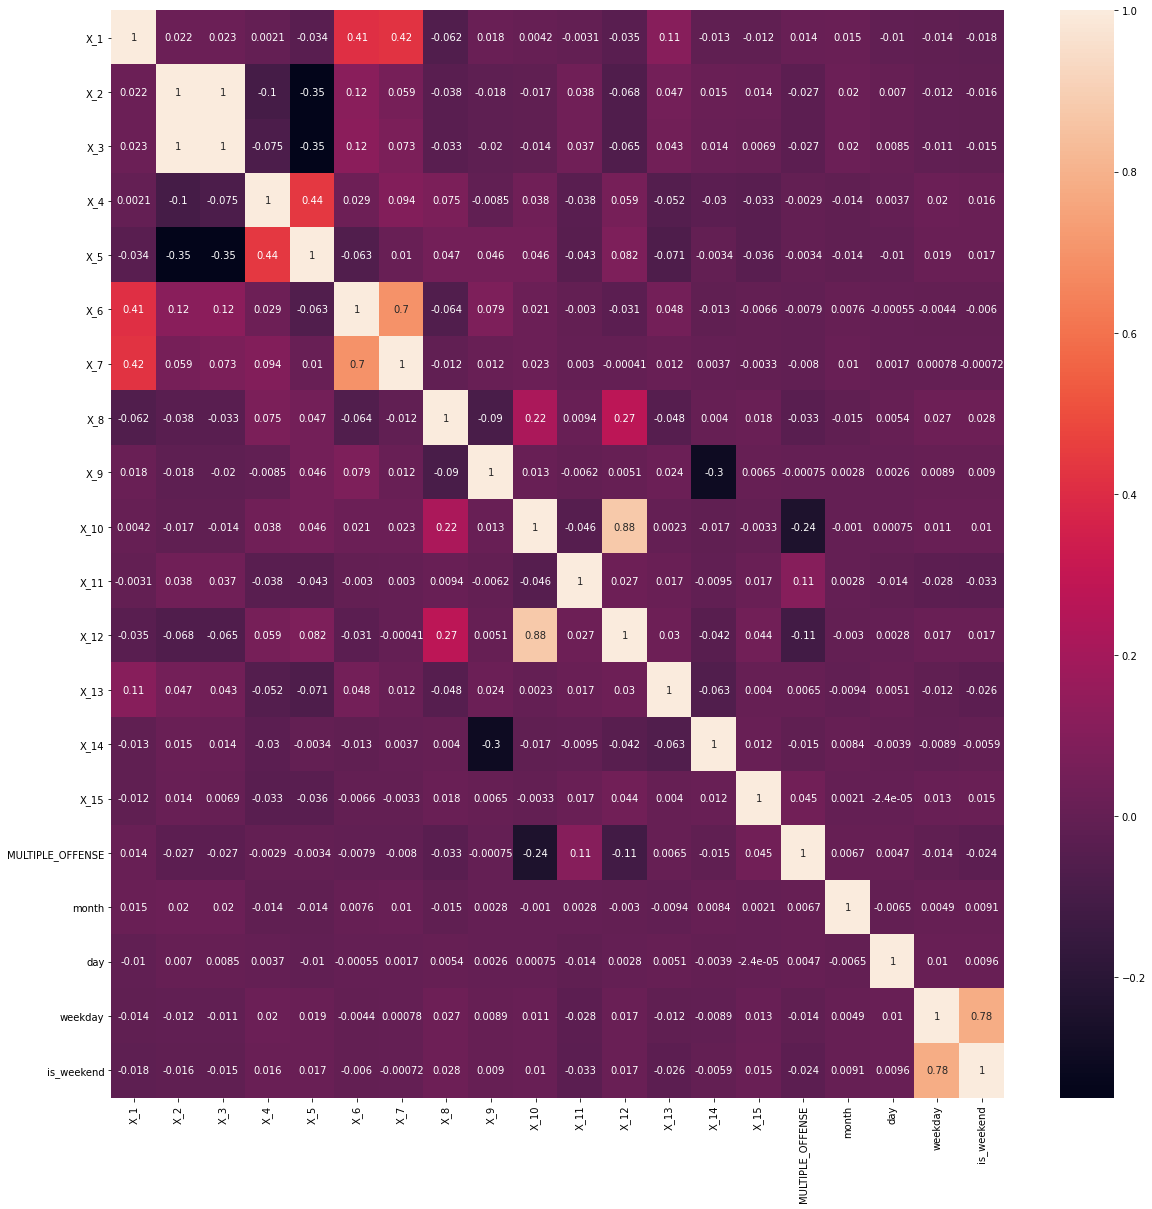

In [69]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)
plt.show()

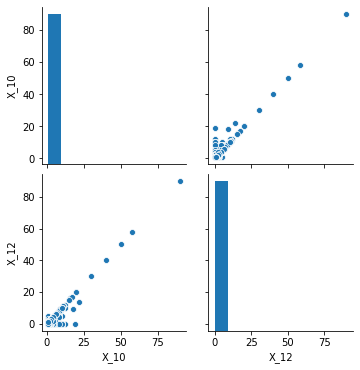

In [71]:
sns.pairplot(train[['X_10','X_12']])

# Model Building

In [0]:
unwanted_cols=['X_3','X_12','MULTIPLE_OFFENSE']
X=train.drop(unwanted_cols,axis=1)
y=train.MULTIPLE_OFFENSE

In [94]:
X.shape

(23856, 17)

## Data preprocessing for Test data

In [89]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [0]:
test_ids=test.INCIDENT_ID
test.drop(['INCIDENT_ID','X_12'],axis=1,inplace=True)

In [0]:
test['DATE']=pd.to_datetime(test['DATE'])
test['month']=test.DATE.apply(lambda x:x.month)
test['day']=test.DATE.apply(lambda x:x.day)
test['weekday']=test.DATE.apply(lambda x:x.weekday())
test['is_weekend']=test.weekday.apply(lambda x: 1 if x==6 or x==5 else 0)

In [0]:
test.drop(['DATE'],axis=1,inplace=True)

In [0]:
test.drop(['X_3'],axis=1,inplace=True)

In [99]:
test.head()

,X_1,X_2,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_13,X_14,X_15,month,day,weekday,is_weekend
0,0,30,7,3,6,4,0,5,1,174,72,119,23,2,1,3,0
1,0,44,1,3,7,1,4,6,1,316,12,29,34,3,5,4,0
2,0,34,3,5,2,7,3,0,1,316,72,0,34,1,27,5,1
3,7,3,3,5,9,8,0,5,1,174,112,87,34,8,18,4,0
4,0,7,7,3,2,7,1,5,1,174,112,93,43,10,31,0,0


In [100]:
test.shape

(15903, 17)

### Defining submission function

In [0]:
def sub_file(filename,preds):
    sub=pd.DataFrame()
    sub['INCIDENT_ID']=test_ids
    sub['MULTIPLE_OFFENSE']=preds
    sub.to_csv(filename,index=False)
    print(pd.read_csv(filename).head())

## Let's start model building

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,make_scorer,recall_score,roc_auc_score,classification_report
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [0]:
# oversampling
smote=SMOTE()

In [0]:
def build_model(model,X,y,oversample=0):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
    if oversample==1:
        X_train,y_train=smote.fit_sample(X_train,y_train)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)
    y_scores=model.predict_proba(X_test)[:,1]
    print("ROC_AUC_SCORE : ",roc_auc_score(y_test,y_scores))
    print("Training recall_score : ",recall_score(y_train,y_train_pred))
    print("Testing  recall_score : ",recall_score(y_test,y_pred))
    print("Training accuracy : ",accuracy_score(y_train,y_train_pred))
    print("Testing  accuracy : ",accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    cv_results=cross_val_score(model,X_train,y_train,cv=10,n_jobs=-1)
    print("Cross validation accuracy:", cv_results.mean())
    print(classification_report(y_test,y_pred))

# Logistic Regression

In [88]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_std=std.fit_transform(X)
lr=LogisticRegression()
build_model(lr,X_std,y)

ROC_AUC_SCORE :  0.8915278877028374
Training recall_score :  0.9968732857926494
Testing  recall_score :  0.9962702939885915
Training accuracy :  0.9551456717669252
Testing  accuracy :  0.9536881810561609
[[  10  204]
 [  17 4541]]
Cross validation accuracy: 0.9550933842012842


In [0]:
test_std=std.transform(test)
lr_preds=lr.predict(test_std)

In [0]:
sub_file('06-06-lr.csv',lr_preds)

In [114]:
#balancing
build_model(lr,X_std,y,oversample=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ROC_AUC_SCORE :  0.9280498907128475
Training recall_score :  0.8907295666483818
Testing  recall_score :  0.8955682316805617
Training accuracy :  0.8897421832144816
Testing  accuracy :  0.8943839061190276
[[ 186   28]
 [ 476 4082]]
Cross validation accuracy: 0.8898518924849149
              precision    recall  f1-score   support

           0       0.28      0.87      0.42       214
           1       0.99      0.90      0.94      4558

    accuracy                           0.89      4772
   macro avg       0.64      0.88      0.68      4772
weighted avg       0.96      0.89      0.92      4772



# SVM

In [107]:
std=StandardScaler()
X_std=std.fit_transform(X)
svc=SVC(probability=True)
build_model(svc,X_std,y)

ROC_AUC_SCORE :  0.925799559570725
Training recall_score :  0.9996160175534833
Testing  recall_score :  0.999341816586222
Training accuracy :  0.9623768601970237
Testing  accuracy :  0.9585079631181894
[[  19  195]
 [   3 4555]]
Cross validation accuracy: 0.958342338454172


# DecisionTree

In [118]:
dt=DecisionTreeClassifier(random_state=42)
build_model(dt,X,y)

ROC_AUC_SCORE :  0.9924421680274592
Training recall_score :  1.0
Testing  recall_score :  0.9989030276437034
Training accuracy :  1.0
Testing  accuracy :  0.9983235540653814
[[ 211    3]
 [   5 4553]]
Cross validation accuracy: 0.9985852351160178
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       214
           1       1.00      1.00      1.00      4558

    accuracy                           1.00      4772
   macro avg       0.99      0.99      0.99      4772
weighted avg       1.00      1.00      1.00      4772



In [0]:
dt_preds=dt.predict(test)
sub_file('06-06-dt.csv',dt_preds)

In [120]:
dt.get_depth()

11

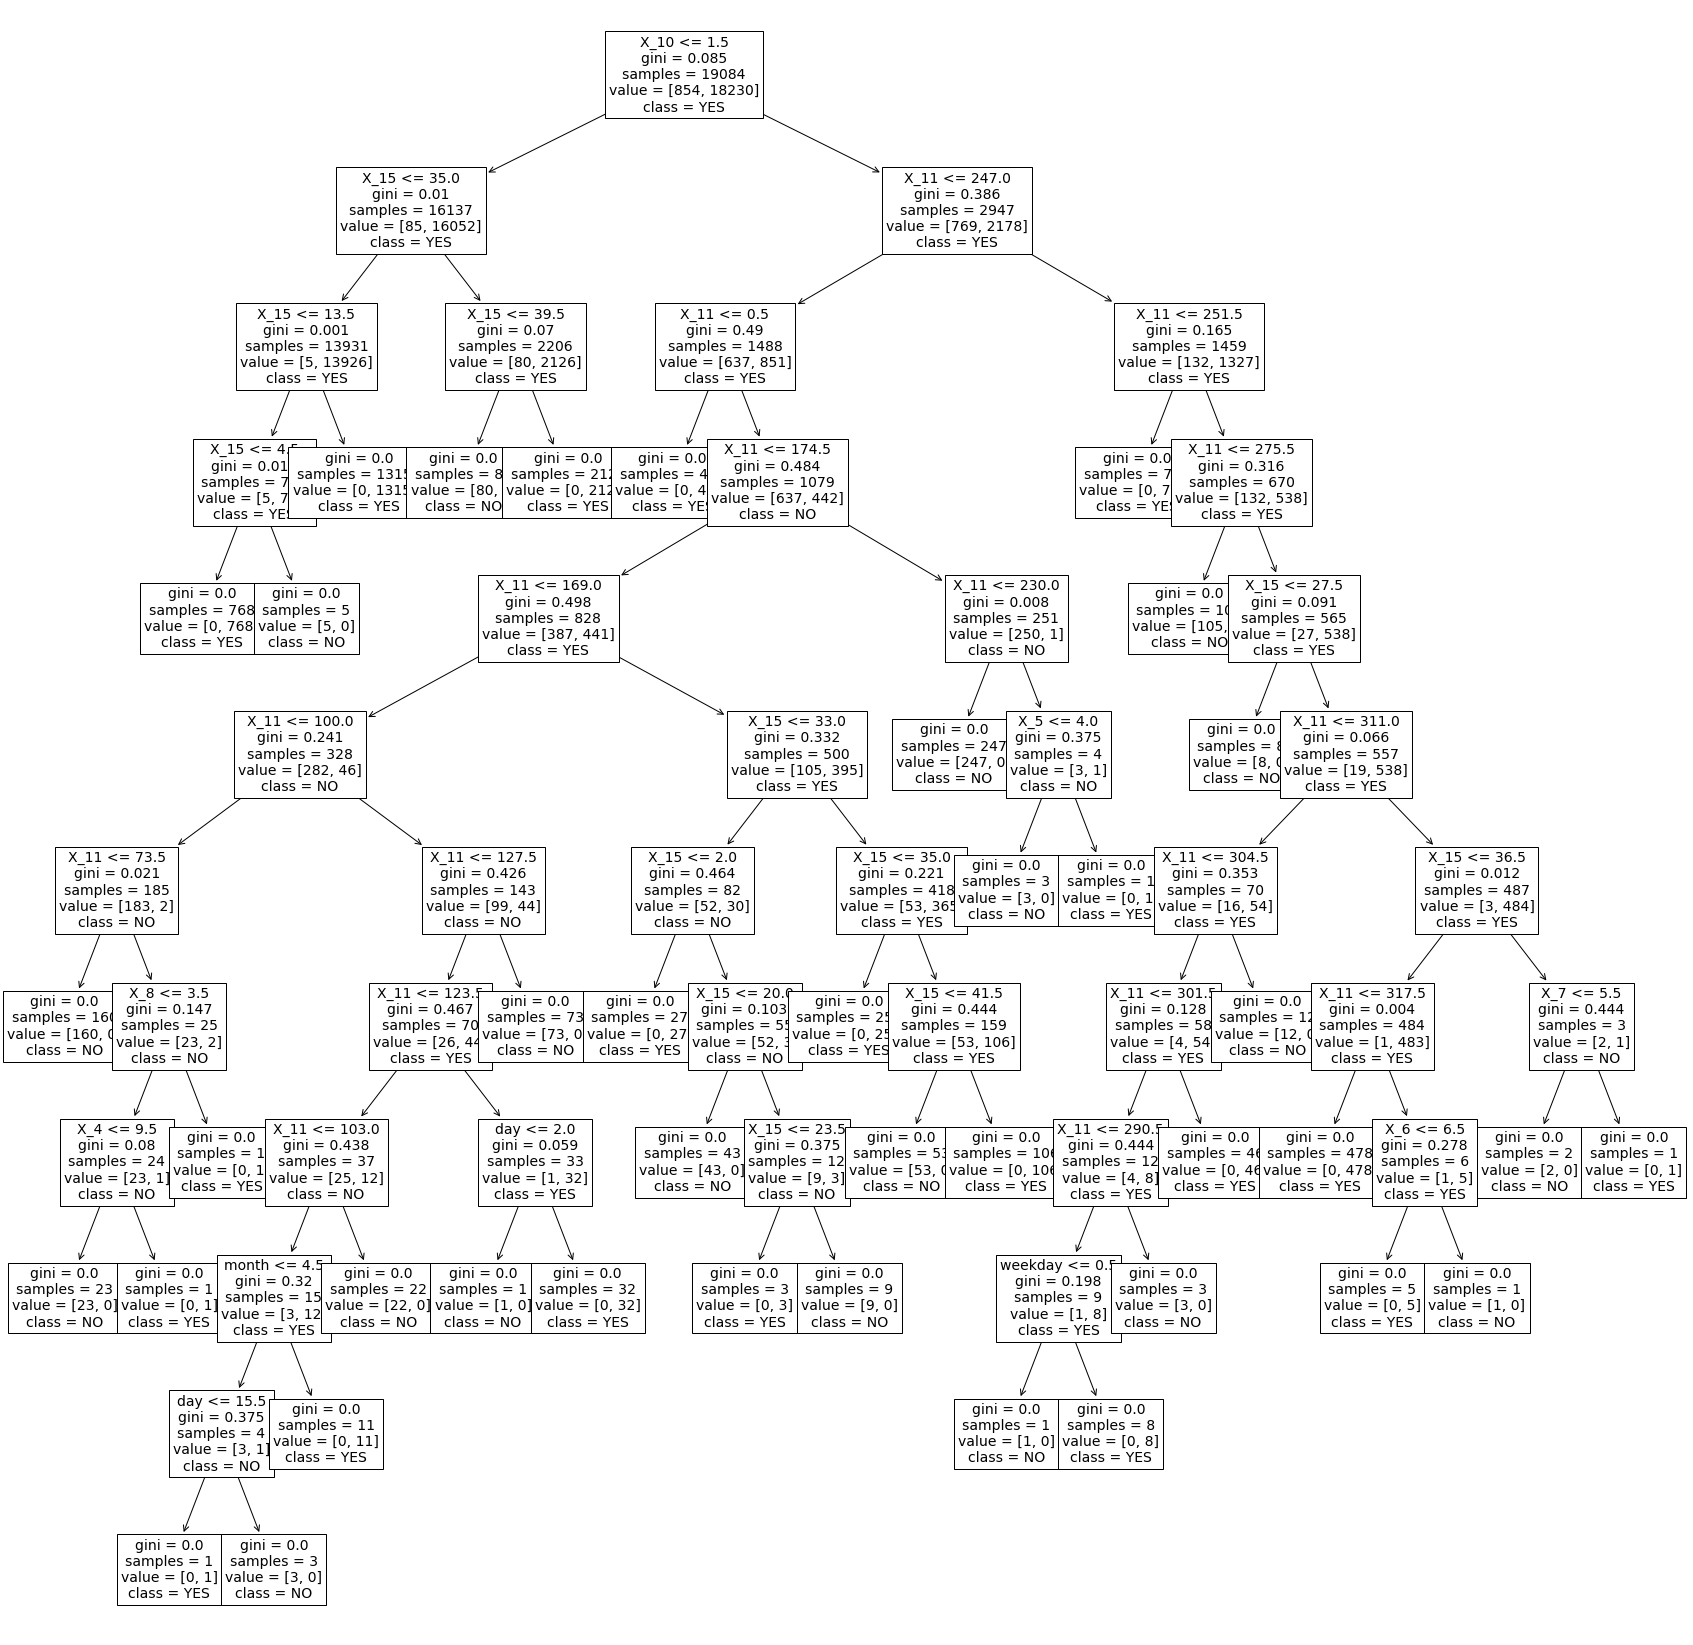

In [127]:
plt.figure(figsize=(30,30))
plot_tree(dt,feature_names=X.columns,class_names=["NO","YES"],fontsize=14)
plt.show()

In [128]:
dtb=DecisionTreeClassifier(random_state=42)
build_model(dtb,X,y,oversample=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ROC_AUC_SCORE :  0.9837873636986216
Training recall_score :  1.0
Testing  recall_score :  0.9956121105748135
Training accuracy :  1.0
Testing  accuracy :  0.9945515507124896
[[ 208    6]
 [  20 4538]]
Cross validation accuracy: 0.9956664838178826
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       214
           1       1.00      1.00      1.00      4558

    accuracy                           0.99      4772
   macro avg       0.96      0.98      0.97      4772
weighted avg       0.99      0.99      0.99      4772



In [129]:
dtb.get_depth()

21

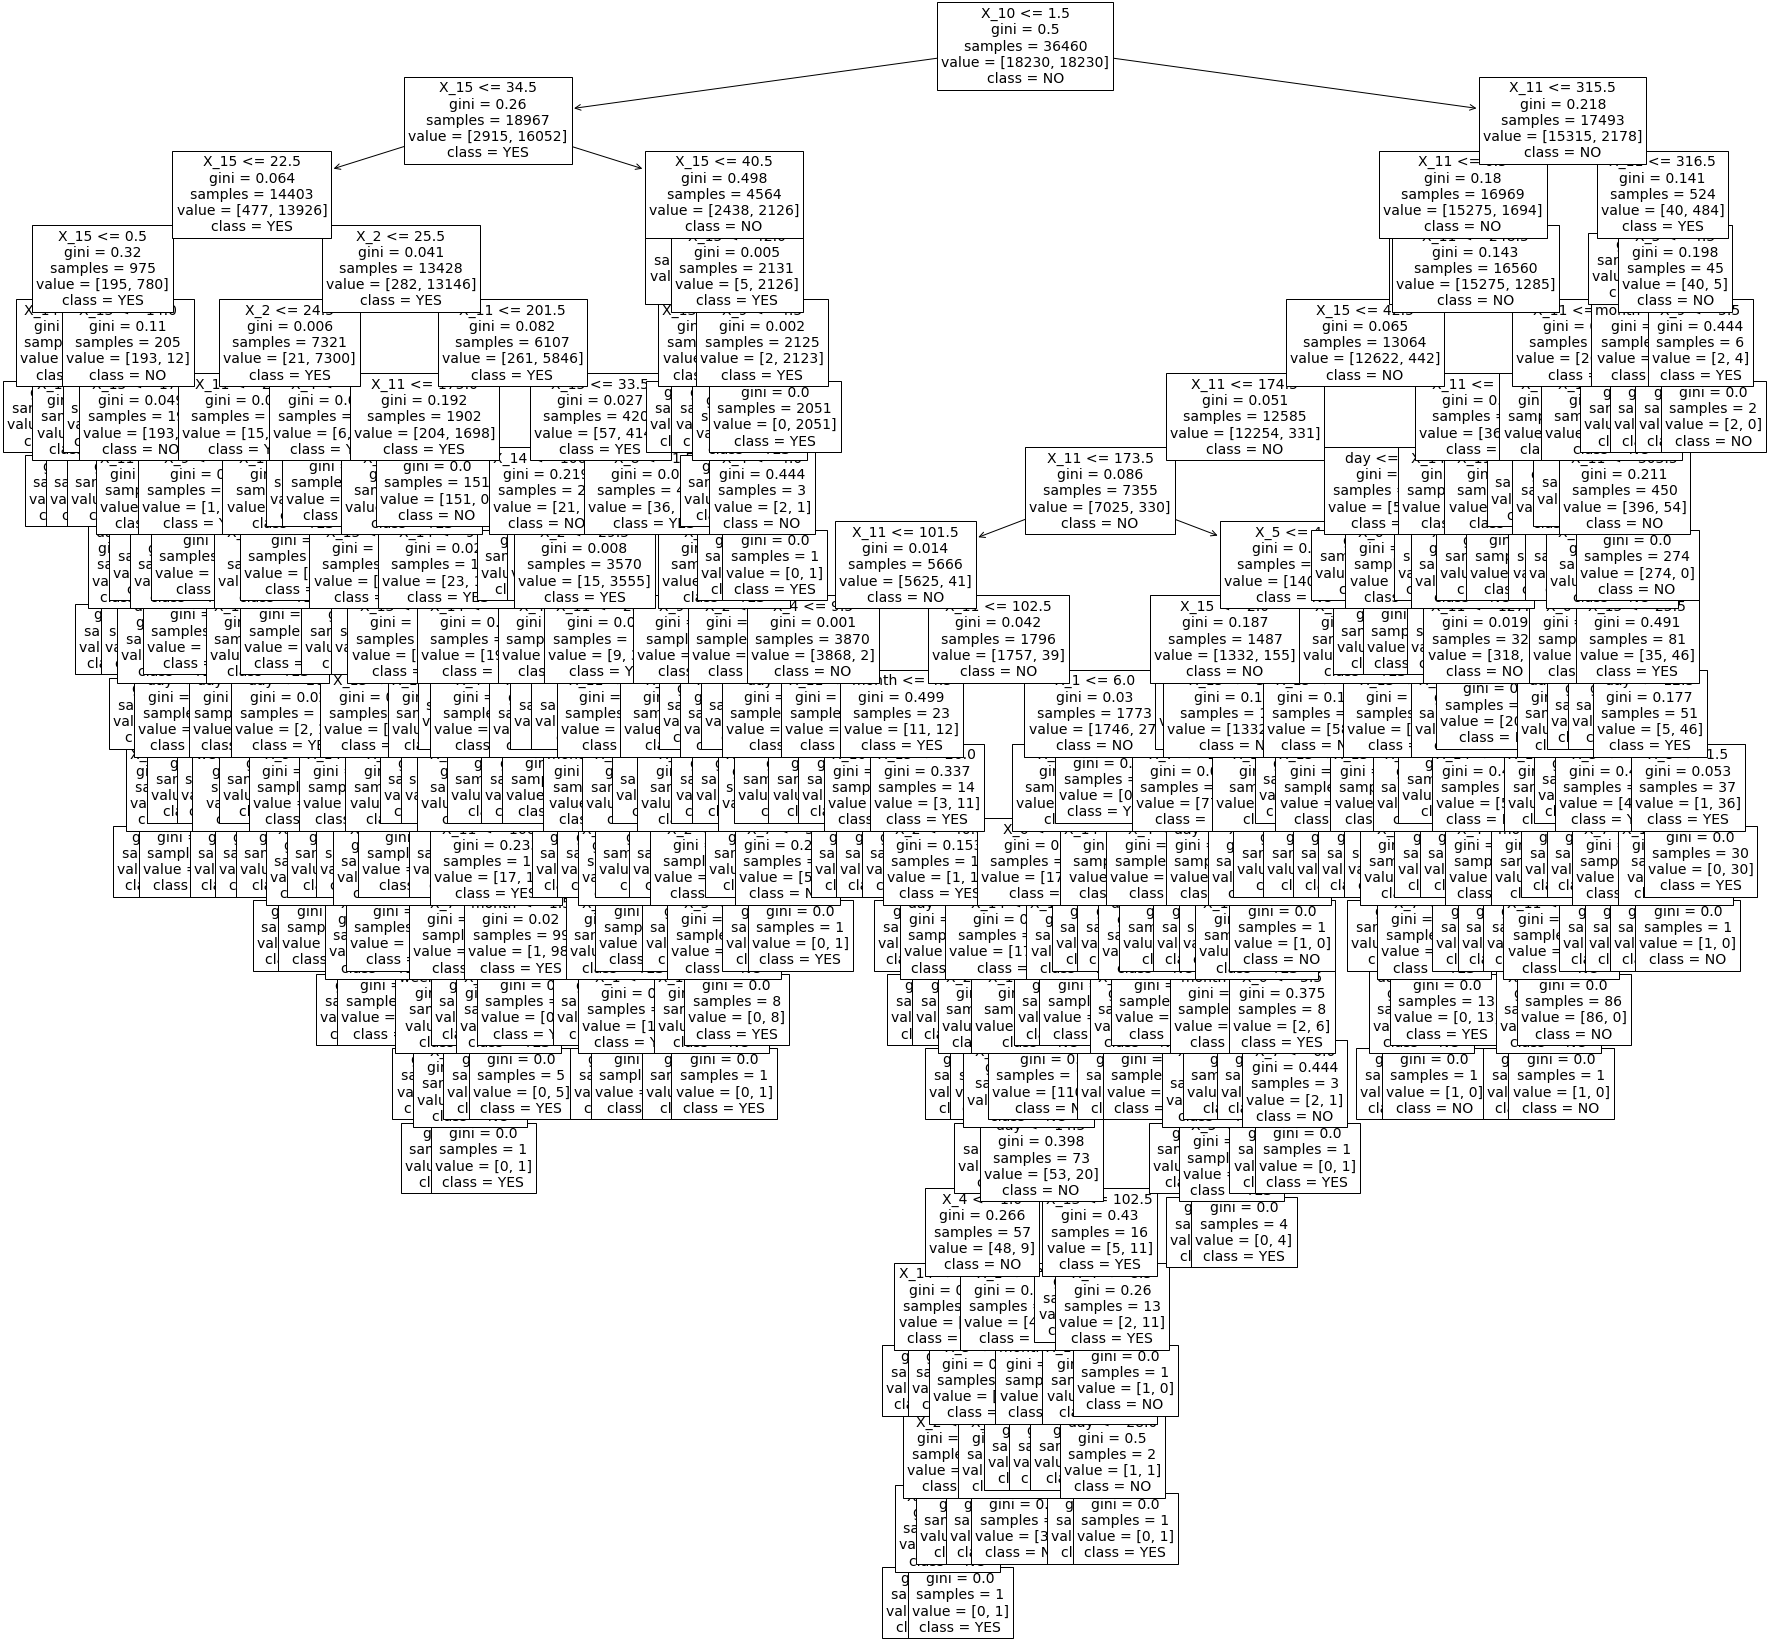

In [130]:
plt.figure(figsize=(30,30))
plot_tree(dtb,feature_names=X.columns,class_names=["NO","YES"],fontsize=14)
plt.show()

In [0]:
dtb_preds=dtb.predict(test)
sub_file('06-06-dt-balanced.csv',dtb_preds)

# RandomForestClassifier

In [132]:
rf=RandomForestClassifier(random_state=42)
build_model(rf,X,y)

ROC_AUC_SCORE :  0.9994110181133715
Training recall_score :  1.0
Testing  recall_score :  0.998683633172444
Training accuracy :  1.0
Testing  accuracy :  0.9949706621961442
[[ 196   18]
 [   6 4552]]
Cross validation accuracy: 0.9929260657615423
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       214
           1       1.00      1.00      1.00      4558

    accuracy                           0.99      4772
   macro avg       0.98      0.96      0.97      4772
weighted avg       0.99      0.99      0.99      4772



In [0]:
rf_preds=rf.predict(test)
sub_file('06-06-rf.csv',rf_preds)

# XGBOOST

In [134]:
xg=XGBClassifier(random_state=42)
build_model(xg,X,y)

ROC_AUC_SCORE :  0.9997800929248358
Training recall_score :  0.9996160175534833
Testing  recall_score :  0.9991224221149627
Training accuracy :  0.9985328023475163
Testing  accuracy :  0.9981139983235541
[[ 209    5]
 [   4 4554]]
Cross validation accuracy: 0.996803593921763
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       214
           1       1.00      1.00      1.00      4558

    accuracy                           1.00      4772
   macro avg       0.99      0.99      0.99      4772
weighted avg       1.00      1.00      1.00      4772



In [0]:
xg_preds=xg.predict(test)
sub_file('06-06-xg.csv',xg_preds)

# Hyperparameter tuning

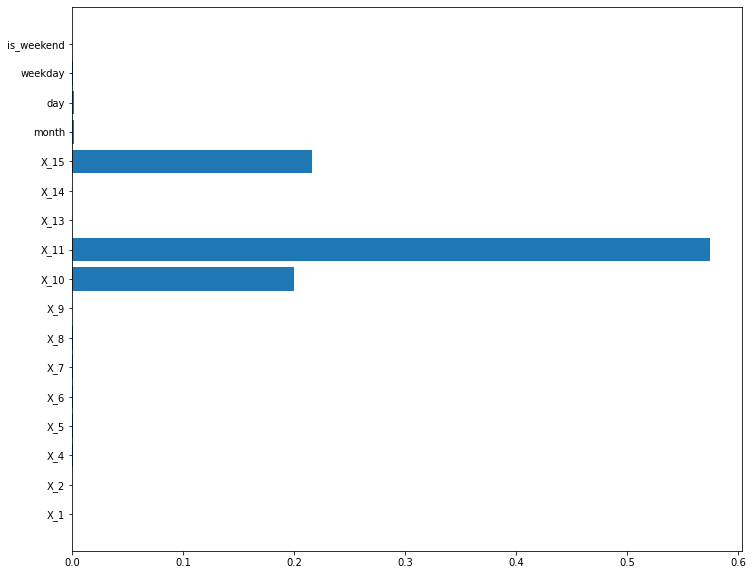

In [142]:
plt.figure(figsize=(12,10))
plt.barh(y=X.columns,width=dt.feature_importances_)
plt.show()

In [140]:
dt.feature_importances_

array([0.        , 0.        , 0.00117474, 0.00091936, 0.00102151,
       0.00081721, 0.00108076, 0.        , 0.19968162, 0.57412413,
       0.        , 0.        , 0.21596043, 0.00202259, 0.00210803,
       0.00108961, 0.        ])

In [0]:
best_features=['X_10','X_11','X_15','day','month']

In [144]:
dt_bf=DecisionTreeClassifier()
build_model(dt_bf,X[best_features],y)

ROC_AUC_SCORE :  0.9924421680274592
Training recall_score :  1.0
Testing  recall_score :  0.9989030276437034
Training accuracy :  1.0
Testing  accuracy :  0.9983235540653814
[[ 211    3]
 [   5 4553]]
Cross validation accuracy: 0.9987949061765246
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       214
           1       1.00      1.00      1.00      4558

    accuracy                           1.00      4772
   macro avg       0.99      0.99      0.99      4772
weighted avg       1.00      1.00      1.00      4772



In [145]:
test_bf=test[best_features]
dtbf_preds=dt_bf.predict(test_bf)
sub_file('06-06-dtbf.csv',dtbf_preds)

  INCIDENT_ID  MULTIPLE_OFFENSE
0   CR_195453                 1
1   CR_103520                 1
2   CR_196089                 1
3   CR_112195                 1
4   CR_149832                 1


In [146]:
dt_bf.feature_importances_

array([0.20060098, 0.57540102, 0.21596043, 0.00519776, 0.0028398 ])

In [149]:
refined_features=['X_10','X_11','X_15']
dtrf=DecisionTreeClassifier(random_state=42)
build_model(dtrf,X[refined_features],y)

ROC_AUC_SCORE :  0.9997806055287406
Training recall_score :  1.0
Testing  recall_score :  0.9995612110574813
Training accuracy :  1.0
Testing  accuracy :  0.9995808885163453
[[ 214    0]
 [   2 4556]]
Cross validation accuracy: 0.998952138880927
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       214
           1       1.00      1.00      1.00      4558

    accuracy                           1.00      4772
   macro avg       1.00      1.00      1.00      4772
weighted avg       1.00      1.00      1.00      4772



In [150]:
dtrf_preds=dtrf.predict(test[refined_features])


  INCIDENT_ID                                   MULTIPLE_OFFENSE
0   CR_195453  DecisionTreeClassifier(ccp_alpha=0.0, class_we...
1   CR_103520  DecisionTreeClassifier(ccp_alpha=0.0, class_we...
2   CR_196089  DecisionTreeClassifier(ccp_alpha=0.0, class_we...
3   CR_112195  DecisionTreeClassifier(ccp_alpha=0.0, class_we...
4   CR_149832  DecisionTreeClassifier(ccp_alpha=0.0, class_we...


In [151]:
sub_file('06-06-dt-x10-x11-x15.csv',dtrf_preds)

  INCIDENT_ID  MULTIPLE_OFFENSE
0   CR_195453                 1
1   CR_103520                 1
2   CR_196089                 1
3   CR_112195                 1
4   CR_149832                 1


In [152]:
dtrf.feature_importances_

array([0.20049883, 0.57793914, 0.22156203])

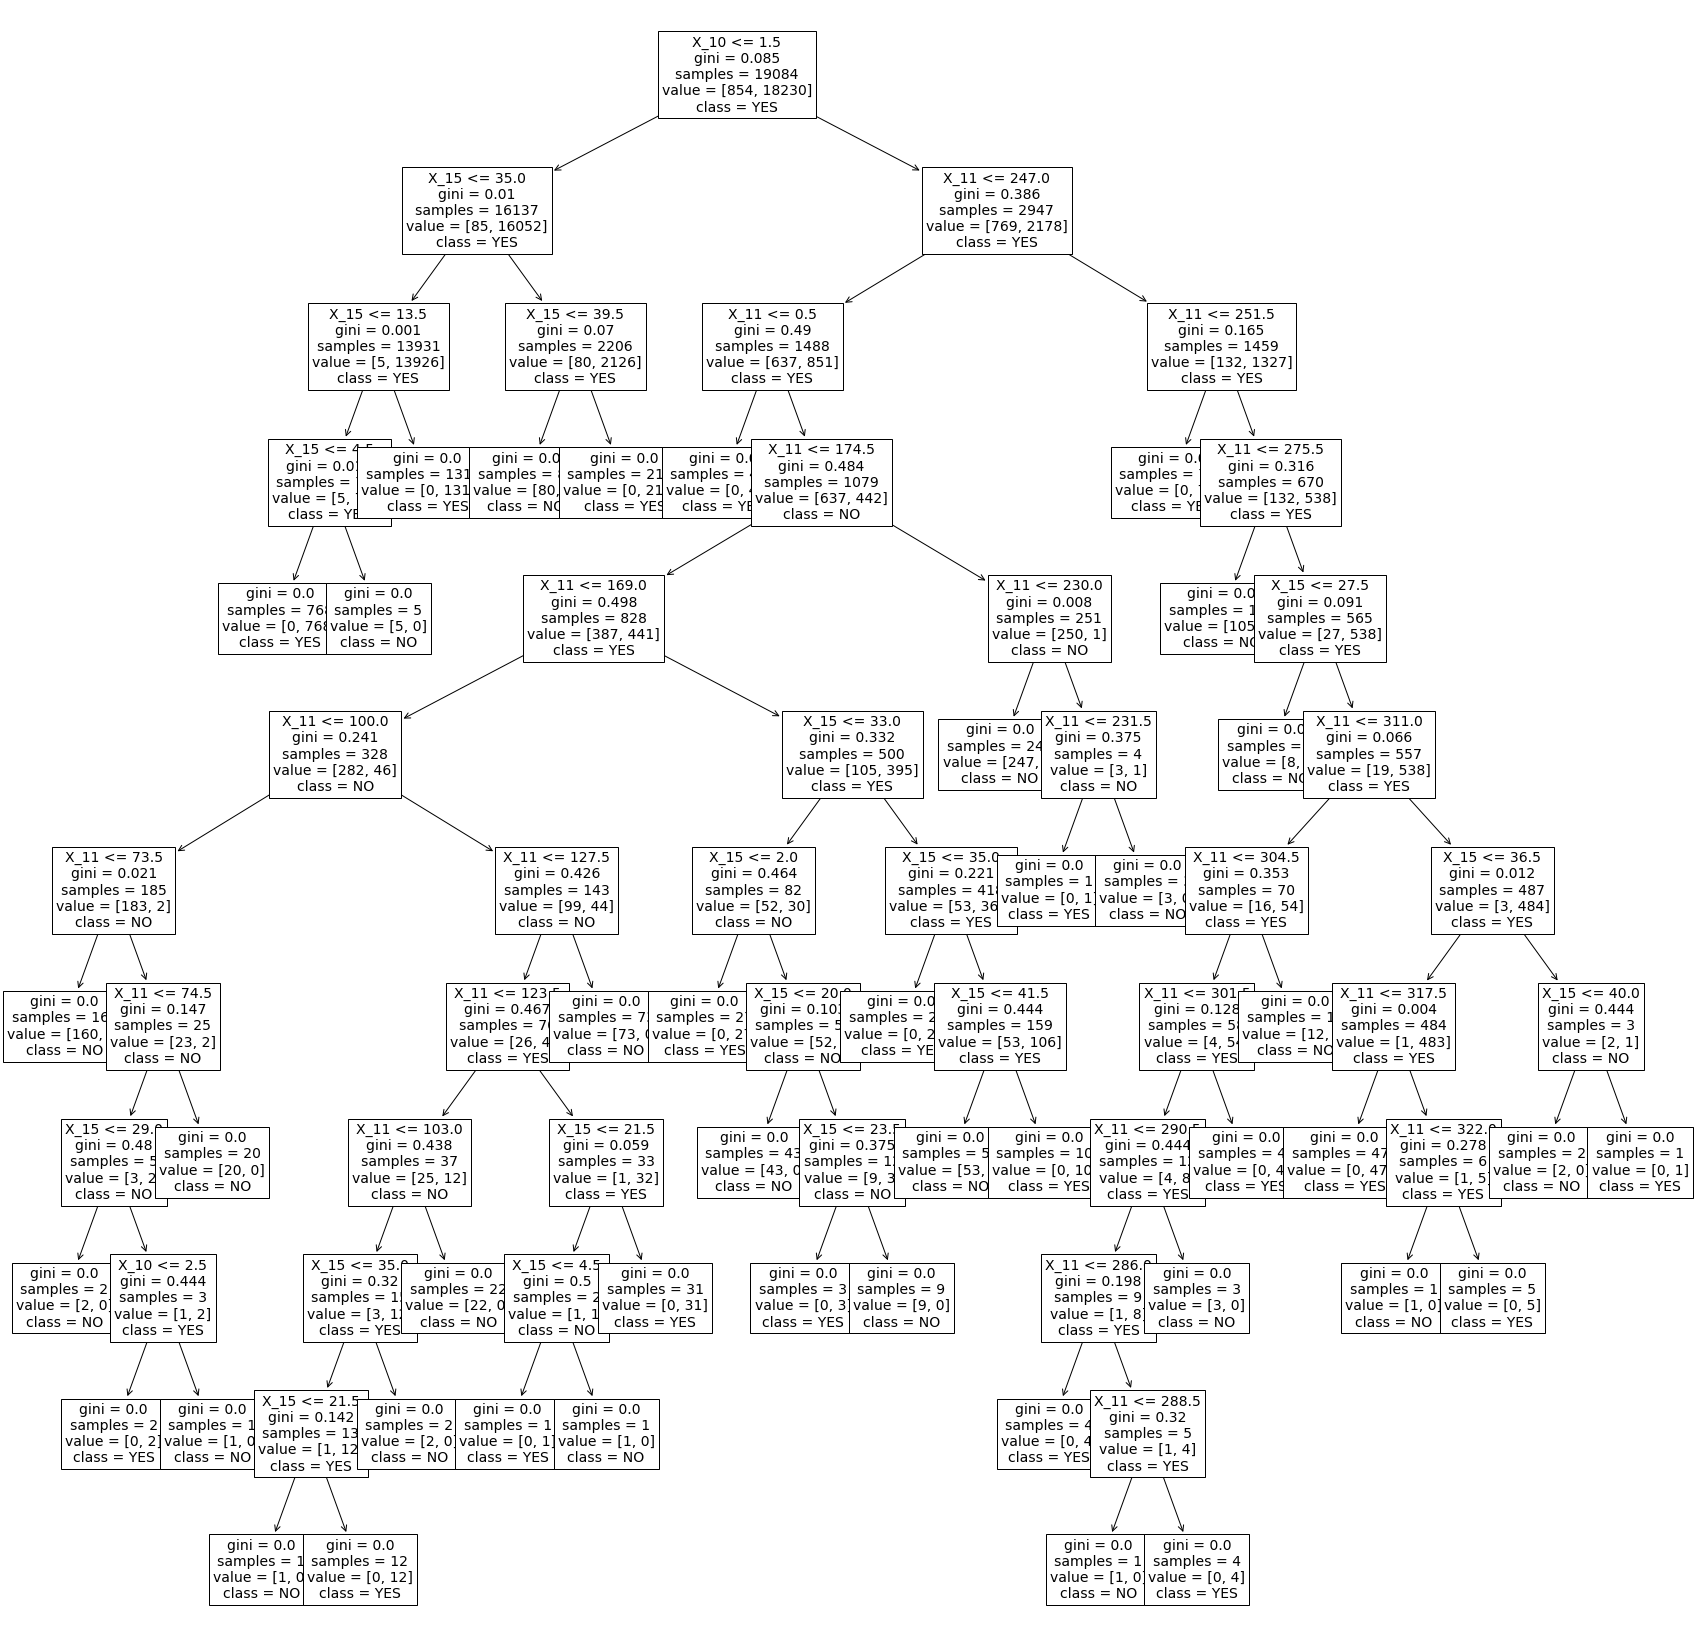

In [154]:
plt.figure(figsize=(30,30))
plot_tree(dtrf,feature_names=['X_10','X_11','X_15'],class_names=["NO","YES"],fontsize=14)
plt.show()

In [155]:
#solo check
dt_x11=DecisionTreeClassifier(random_state=42)
build_model(dt_x11,X[['X_11']],y)

ROC_AUC_SCORE :  0.9391831349214486
Training recall_score :  1.0
Testing  recall_score :  1.0
Training accuracy :  0.9893628170194928
Testing  accuracy :  0.9880553227158424
[[ 157   57]
 [   0 4558]]
Cross validation accuracy: 0.9886296347544951
              precision    recall  f1-score   support

           0       1.00      0.73      0.85       214
           1       0.99      1.00      0.99      4558

    accuracy                           0.99      4772
   macro avg       0.99      0.87      0.92      4772
weighted avg       0.99      0.99      0.99      4772



In [156]:
dtx11_preds=dt_x11.predict(test[['X_11']])
sub_file('06-06-dtX11.csv',dtx11_preds)

  INCIDENT_ID  MULTIPLE_OFFENSE
0   CR_195453                 1
1   CR_103520                 1
2   CR_196089                 1
3   CR_112195                 1
4   CR_149832                 1
